In [ ]:
# Day, FLTNum,  Origin, Destination, NumPassengers, Revenue

In [ ]:
all_flt_nums = list(range(10, 100, 2))
len(all_flt_nums)

45

In [ ]:
all_cities = "BOS LAX SEA ORH ATL BWI STL DFW PHX SFO".split(" ")
all_cities

['BOS', 'LAX', 'SEA', 'ORH', 'ATL', 'BWI', 'STL', 'DFW', 'PHX', 'SFO']

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
flight_roster = {flt: random.sample(all_cities, 2) for flt in all_flt_nums}
flight_roster
    
    

{10: ['SFO', 'BOS'],
 12: ['ORH', 'LAX'],
 14: ['DFW', 'SFO'],
 16: ['LAX', 'SEA'],
 18: ['SFO', 'PHX'],
 20: ['DFW', 'ORH'],
 22: ['LAX', 'SEA'],
 24: ['STL', 'ATL'],
 26: ['SFO', 'ATL'],
 28: ['BOS', 'ORH'],
 30: ['ATL', 'BOS'],
 32: ['ATL', 'DFW'],
 34: ['LAX', 'STL'],
 36: ['PHX', 'LAX'],
 38: ['DFW', 'PHX'],
 40: ['LAX', 'SFO'],
 42: ['SEA', 'LAX'],
 44: ['LAX', 'STL'],
 46: ['DFW', 'BWI'],
 48: ['ATL', 'SEA'],
 50: ['ORH', 'SEA'],
 52: ['BOS', 'STL'],
 54: ['DFW', 'BWI'],
 56: ['LAX', 'PHX'],
 58: ['LAX', 'DFW'],
 60: ['BOS', 'ATL'],
 62: ['SFO', 'PHX'],
 64: ['SEA', 'BWI'],
 66: ['SFO', 'SEA'],
 68: ['ATL', 'ORH'],
 70: ['BOS', 'BWI'],
 72: ['ORH', 'STL'],
 74: ['DFW', 'PHX'],
 76: ['SEA', 'ATL'],
 78: ['BOS', 'STL'],
 80: ['STL', 'SEA'],
 82: ['STL', 'SEA'],
 84: ['ORH', 'PHX'],
 86: ['STL', 'SEA'],
 88: ['BOS', 'BWI'],
 90: ['BWI', 'SFO'],
 92: ['SEA', 'ATL'],
 94: ['PHX', 'ORH'],
 96: ['ORH', 'SFO'],
 98: ['PHX', 'LAX']}

In [ ]:
weekday_flts = flight_roster
len(weekday_flts)

45

In [ ]:
weekend_flts = {flt: flight_roster[flt] for flt in flight_roster if flt % 3 != 0}
len(weekend_flts)

30

In [ ]:
num_pax_mean = 250
revenue_per_pax_mean = 400
with open("KJBAir_info.csv", "w") as outf:
    for day in range(1,365):
        roster = weekend_flts if (day%6==0 or day%7==0) else weekday_flts
        for flt in roster:
            num_pax = np.floor(num_pax_mean + 80*np.random.randn())
            revenue = num_pax * np.floor(revenue_per_pax_mean + 50*np.random.randn())
            fields = map(str, [day, flt, roster[flt][0], roster[flt][1], num_pax, revenue])
            line = ",".join(fields) + "\n"
            outf.write(line)
        
        

In [ ]:
flt2 = pd.read_csv('/content/KJBAir_info.csv')

table = pd.DataFrame(flt2)
table

table.columns = ['Day', 'FLTNum',  'Origin', 'Destination', 'NumPassengers', 'Revenue']
table

,Day,FLTNum,Origin,Destination,NumPassengers,Revenue
0,1,12,ORH,LAX,302.0,130766.0
1,1,14,DFW,SFO,277.0,114124.0
2,1,16,LAX,SEA,301.0,119798.0
3,1,18,SFO,PHX,213.0,74337.0
4,1,20,DFW,ORH,396.0,172656.0
...,...,...,...,...,...,...
14814,364,86,STL,SEA,259.0,104377.0
14815,364,88,BOS,BWI,234.0,95004.0
14816,364,92,SEA,ATL,299.0,128869.0
14817,364,94,PHX,ORH,279.0,103509.0


In [ ]:
# Question 1
# Find the total revenue for all flights for the entire year.
toprev = table.Revenue.sum()
toprev

1468725903.0

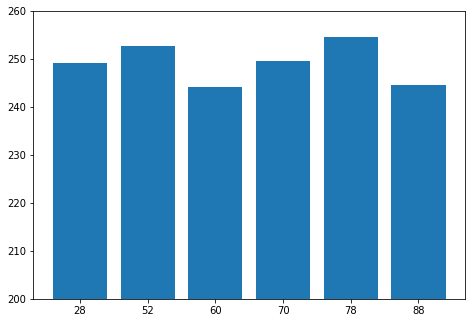

In [ ]:
#Question 2
#Find the average number of passengers on each of the 5 flights that originate from BOS.
#Note the above is pulled from Moodle, doublechecked its 6 flights originating in BOS

#Filter
Bosmean = table[table['Origin'] =='BOS']

#Identify the mean
Bosmean2 = Bosmean.groupby('FLTNum').mean()

#View
Bosmean2

#Plot Flights
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ('28', '52', '60', '70', '78', '88')
y = (249.159341, 252.664835, 244.100000, 249.450549, 254.503846, 244.601648)
ax.bar(x, y)
ax.set_ylim(200,260)
plt.show()

In [ ]:
#Question 3
#Find the flight number with the highest total revenue for the year (i.e., summed over all days in the year)

revsum = table.groupby(['FLTNum']).sum()
revsum2 = revsum.sort_values(by='Revenue', ascending = False)
revsum2.head(1)

,Day,NumPassengers,Revenue
FLTNum,,,
62,66430,93114.0,37656391.0


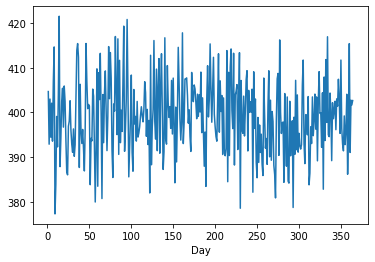

In [ ]:
#Question 4
#For each day of the year, find the revenue per passenger averaged over all flights on that day.
revsum = table.groupby(['Day']).sum()
revsum['AvgRev'] = revsum['Revenue']/revsum['NumPassengers']
revsum2 = revsum.AvgRev
revsum2

#Plot
revsum2.plot()


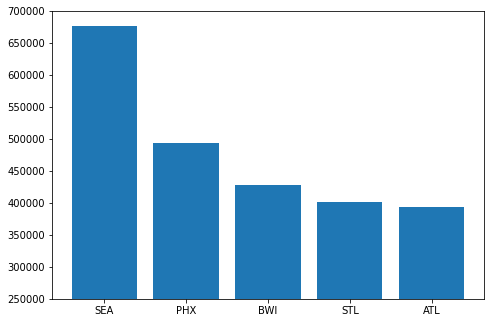

In [ ]:
#Question 5
#Find the five most popular destinations 
#(i.e., the one more people fly to than any other) and the total number of passengers flying to each.
despop = table.groupby(['Destination']).sum()
despop2= despop.sort_values(by='NumPassengers', ascending = False)
despop2.head()

#Plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ('SEA', 'PHX', 'BWI', 'STL', 'ATL')
y= (675828.0, 493515.0, 428177.0, 401888.0, 392939.0)
ax.bar(x, y)
ax.set_ylim(250000,700000)
plt.show()
